# Graded Lab Assignment: Logistic Regression (10 points)

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignment are distributed as follows:
* The implementation
    - prediction_function (0.5)
    - cost_function (1)
    - compute_gradient (1)
    - correct double for loop (2)
    - correct stop condition (0.5)
    - preventing overfitting (1)
    - systematically choosing learning rate (1) 
    - best score analysis (1)
    - summary (1)
    - comments (0.5)
    - code (0.5)
    

In [125]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


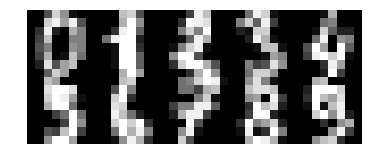

In [126]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Write a short summary of what you have done (and why) to accomplish steps (1), (2) and (3).
(5) Make sure to comment your code!

In [127]:
# The prediction function uses multiple thetas to predict the probability 
# that the image is the handwritten number 0, 1, 2, ... or 9 
def prediction_function(x,theta):
    h = 1 / (1 + exp(-theta.T@x))
    return h

In [128]:
# The cost function computes how far apart the predicted values and the actual values are
def cost_function(x_predict,y):     
    cost = (-1 / len(y)) * (y * log(x_predict) + (1 - y) * log(1 - x_predict)).sum()
    return cost

In [129]:
# The compute gradient function calculates the gradient values for each of the thetas
def compute_gradient(x_predict, y, x):
    gradient = 1 / len(x) * np.outer(x_predict - y, x)
    return gradient

In [130]:
# This is the main function that uses gradient descent to find optimal values for the thetas and tests
# these values using the learning rate that is given as function argument
def logistic_regression(learningrate):
    alpha = learningrate
    # A number of default constants are declared here
    iterations = 25
    theta = np.zeros((64,10))

    # The following three arrays will be filled with the cost function, 
    # number prediction and percentage correct values respectively
    Jcost = np.zeros(iterations)
    test_predictions = np.zeros(len(x_test), dtype=int)
    percentage = np.zeros(iterations)

    for i in range(iterations):                                 # For the number of gradient descent iterations
        
        # Training on x
        for j in range(x.shape[0]):                             # For all training examples
            x_predict = prediction_function(x[j,:], theta)
            y = np.zeros(10)
            y[target[j]] = 1                                    # Set correct number to 1 in y

            # Update rule for theta using the previous value, the learning rate and the gradients
            theta = theta - alpha * compute_gradient(x_predict, y, x[j,:]).T

        Jcost[i] = (cost_function(x_predict,y))                 # Save the cost value for the thetas of this iteration in Jcost

        # Testing on x_test
        errors = 0
        for j in range(x_test.shape[0]):
            index = np.argmax(prediction_function(x_test[j,:], theta))
            test_predictions[j] = index                         # Save index of the number with the highest probability

            if index != target_test[j]:
                errors += 1                                     # If the prediction was not correct, increase error by 1
        percentage[i] = 100 - errors * 100 / x_test.shape[0]    # Save the percentage correct of this iteration in percentages

    print("For alpha = {1}, the final percentage of correctly predicted numbers was: {0:.2f}%".format(percentage[iterations - 1], alpha))


    # Plot of the percentages
    plt.plot(percentage)
    plt.title('% Correctly predicted handwritten numbers', fontsize=14)
    plt.xlabel('# of iterations', fontsize=12)
    plt.ylabel('Percentage correct (%) ', fontsize=12)
    
    # Return the last and (most likely) highest percentage
    return percentage[iterations - 1]


In [131]:
# This function can be used to quickly check the success rate of the algorithm using different learning rates
def learning_rates(alphaslist):
    percentages = []
    
    for alpha in alphaslist:
        logistic_regression(alpha)
            
    return

For alpha = 0.001, the final percentage of correctly predicted numbers was: 87.88%
For alpha = 0.005, the final percentage of correctly predicted numbers was: 88.89%
For alpha = 0.01, the final percentage of correctly predicted numbers was: 88.22%
For alpha = 0.05, the final percentage of correctly predicted numbers was: 86.53%
For alpha = 0.1, the final percentage of correctly predicted numbers was: 82.83%


E:\Bobbie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Bobbie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


For alpha = 0.5, the final percentage of correctly predicted numbers was: 83.50%


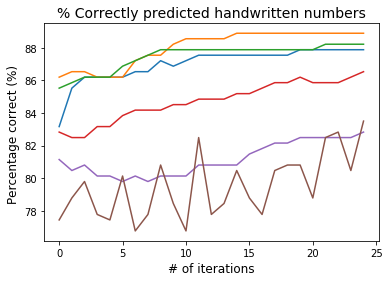

In [132]:
learning_rates([0.001, 0.005, 0.01, 0.05, 0.1, 0.5])

For alpha = 0.005, the final percentage of correctly predicted numbers was: 88.89%


88.888888888888886

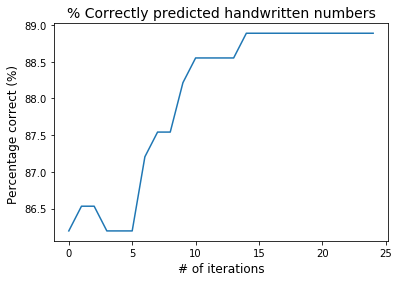

In [133]:
# From our set of alphas, this learning rate had the best success rate
logistic_regression(0.005)

<h3> Summary </h3>
This implementation of logistic regression attempts to predict handwritten numbers on an 8x8 pixel image. The images are provided by the sklearn.datasets load_digits dataset, which is split in a train set x of 1500 examples and a test set x_test of 297 images. All 64 pixels are used as the features of the training examples and a number of theta values, which are optimized using gradient descent, are used to find the function that predicts the numbers based on the pixels of their image as accurately as possible. The number of gradient descent iterations can be specified in the code, as well as the learning rate, in order to optimize the algorithm.

<h3> How it works </h3>
The comments in the code provide more detailed information about how the algorithm works, but to summarize:
For a number of iterations specified in the code and for each training example, the sigmoid function is used to calculate the probabilities that the written number is 0, 1, ..., 9 using the 64 pixels of the image as features. The cost of the function using the thetas is computed and saved at each iteration and the theta matrix is updated using the update rule for logistic regression. After the specified number of iterations, the thetas become the final theta values and these are used to test the function on the test set. For each test example, the probabilities that the number is 0, 1, ..., 9 are calculated using the prediction function with the final thetas and the highest value of these probabilities is taken to be the prediction of the algorithm for that test example. The prediction is now compared to the actual value (as found in target_test) and if it is not correct, the error count increases by one. Once this is done for each test example, a plot is made to show the success rate change after each iteration. Finally the function learning_rates can be used to conveniently compare the success rates of different alpha values with each other. <br><br> A learning rate of 0,005 provided the best success rate (88.89%) of the tested alpha values and it is fairly good for the simple 8x8 images that were used.